In [1]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
XCr_path

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples/../'

In [3]:
 xcr = XCrystal(XCr_path+'/config/C333_Omega12p8keV_waist250um.yaml')

In [4]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/config/C333_Omega12p8keV_waist250um.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta,omega):
    
    xcr = XCrystal(XCr_path+'/config/C333_Omega12p8keV_waist250um.yaml')
    xcr.configure(delta_theta,0)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(8e-6,xcr.omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

No deformation model was selected


Beam propagation progress: 100%|██████████| 3327/3327 [00:09<00:00, 358.87it/s]

Photon energy (omega):  12800.0 ; Reflectivity:  0.9799721869967393 ; Transmission:  0.013387351458429604


In [6]:

xcr.configure(8e-6,xcr.omega0)

No deformation model was selected


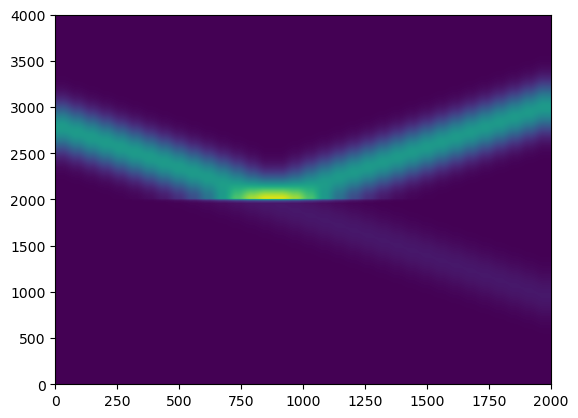

In [7]:
plt.imshow(np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:])**1,extent=[0, 2000,0, 2*xcr.xxmax / xcr.convr * 1e6], aspect='auto')